# Crash Data ACT

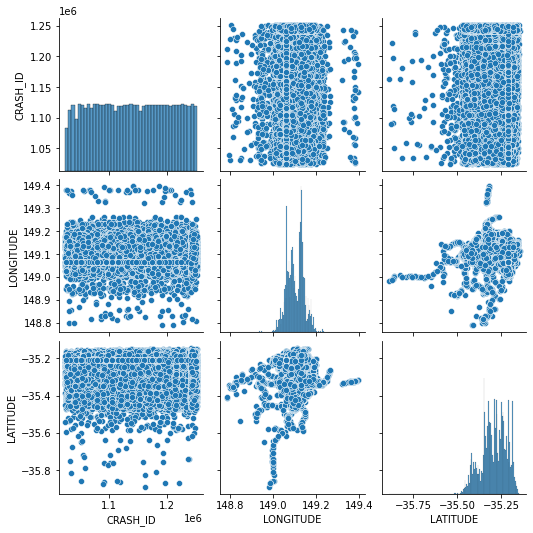

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data=pd.read_csv("/workspace/data/ACT_Road_Crash_Data.csv")
# data = data[crashes['SUBURB_LOCATION'] == 'NAME']
sns.pairplot(data)
plt.show()

In [2]:
def top1(source, field, number):
    counts = source.groupby(field).size().reset_index(name='Crushes')
    filtered = counts[counts['Crushes'] > number]
    df = source[source[field].isin(filtered[field])]
    # Distribution of crashes by severity
    counts = df[field].value_counts()
    print(counts)
    sns.histplot(data=df, y=field)
    display(plt.show())

In [3]:
def top2(source,field,number):
    counts = source.groupby('SUBURB_LOCATION').size().reset_index(name='Crushes')
    filtered = counts[counts['Crushes'] >= number]
    df=source[source['SUBURB_LOCATION'].isin(filtered['SUBURB_LOCATION'])]
    counts = df[field].value_counts()
    print(counts)
    sns.histplot(data=df, x='SUBURB_LOCATION', y=field)
    display(plt.show())

Rear end collision                       3742
Right angle collision                    1419
Other - Vehicle to Vehicle               1190
Same direction side swipe                1075
Right turn into oncoming vehicle          290
Struck object (Off Road)                  271
Collision with parked vehicle             216
Collision while one vehicle reversing     194
Struck pedestrian (On Road)               118
Overturned (On Road)                       45
Struck animal (not ridden On Road)         43
Head on collision                          19
Other -  Single Vehicle (On Road)          17
Opposite direction side swipe              16
Struck object  (On Road)                   12
Struck pedestrian (Off Road)               10
No object struck (Off Road)                 6
Fall from moving vehicle (On Road)          4
Overturned (Off Road)                       4
Struck vehicle (Off Road)                   2
Name: CRASH_TYPE, dtype: int64


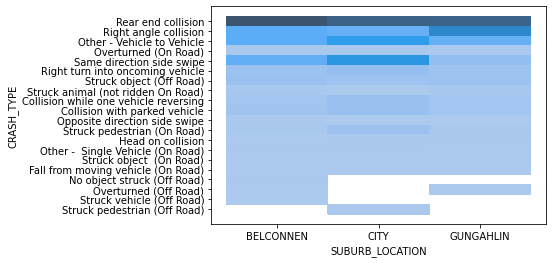

None

Good dry surface         11430
Wet surface               1611
Loose surface               22
Snow or ice                 10
Muddy or oily surface        6
Unknown                      3
Name: ROAD_CONDITION, dtype: int64


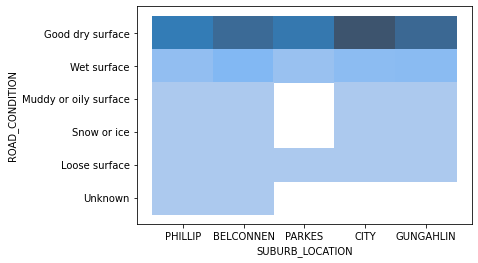

None

Property Damage Only    12311
Injury                    768
Fatal                       3
Name: CRASH_SEVERITY, dtype: int64


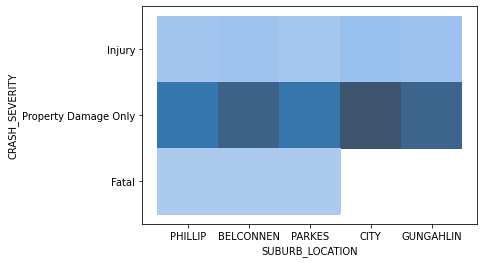

None

In [4]:
top2(data, 'CRASH_TYPE', 2500)
top2(data, 'ROAD_CONDITION', 2000)
top2(data, 'CRASH_SEVERITY', 2000)

Property Damage Only    65834
Injury                   5881
Fatal                      81
Name: CRASH_SEVERITY, dtype: int64


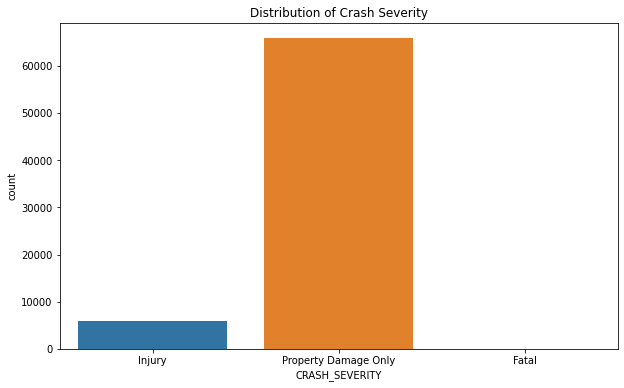

In [5]:
# Data Cleaning - Handling missing values
data['SUBURB_LOCATION'].fillna('Unknown', inplace=True)

# Data Transformation - Convert 'CRASH_DATE' and 'CRASH_TIME' to datetime
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])
data['CRASH_TIME'] = pd.to_datetime(data['CRASH_TIME'], format='%H:%M').dt.time

# Distribution of crashes by severity
severity_counts = data['CRASH_SEVERITY'].value_counts()
print(severity_counts)

# Visualization - Crash Severity Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='CRASH_SEVERITY', data=data)
plt.title('Distribution of Crash Severity')
plt.show()

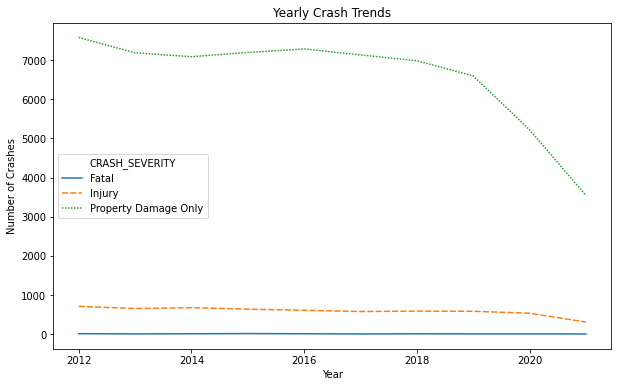

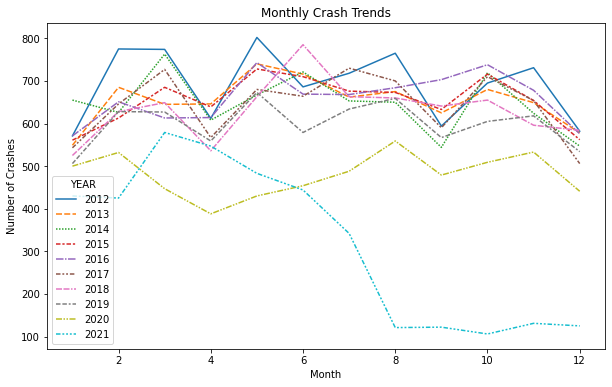

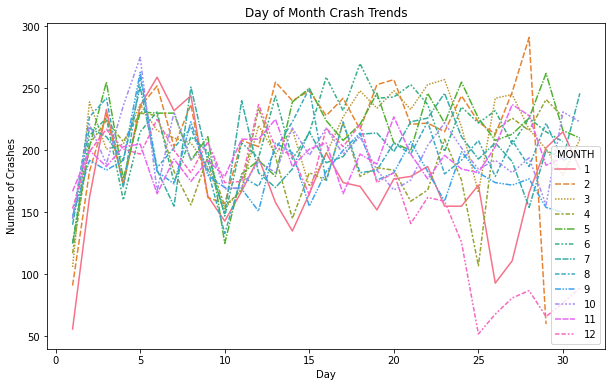

In [6]:
# # Extract year, month, and day for further analysis
data['YEAR'] = data['CRASH_DATE'].dt.year
data['MONTH'] = data['CRASH_DATE'].dt.month
data['DAY'] = data['CRASH_DATE'].dt.day

# Analyzing Yearly Trends
yearly_trends = data.groupby(['YEAR','CRASH_SEVERITY']).size().unstack()
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trends)

# yearly_trends.plot(kind='line')
plt.title('Yearly Crash Trends')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.show()

# Analyzing Monthly Trends (across all years)
monthly_trends = data.groupby(['MONTH', 'YEAR']).size().unstack()
plt.figure(figsize=(10, 6))

# monthly_trends.plot(kind='line')
sns.lineplot(data=monthly_trends)
plt.title('Monthly Crash Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.show()

# Analyzing Day of Month Trends (across all years)
day_trends = data.groupby(['DAY', 'MONTH']).size().unstack()
plt.figure(figsize=(10, 6))

# day_trends.plot(kind='line')
sns.lineplot(data=day_trends)
plt.title('Day of Month Crash Trends')
plt.xlabel('Day')
plt.ylabel('Number of Crashes')
plt.show()

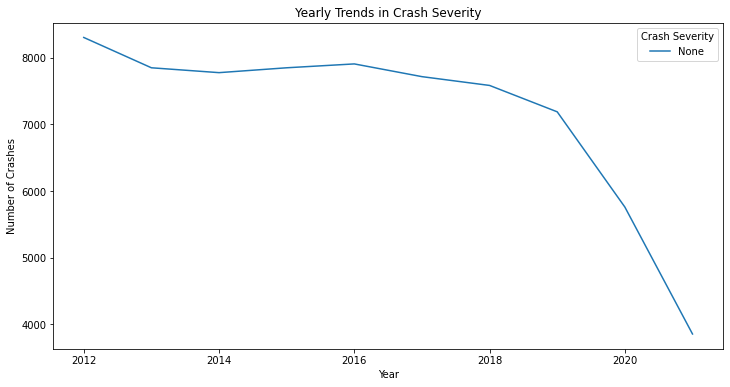

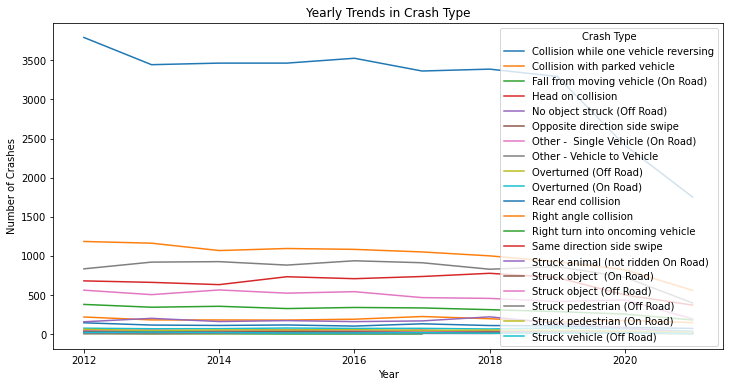

In [7]:
# Analyzing Trends in Crash Severity over Time - Group by year and crash severity
severity_yearly = data.groupby('YEAR').size()

# sns.lineplot(data=severity_yearly)
severity_yearly.plot(kind='line', figsize=(12, 6))
plt.title('Yearly Trends in Crash Severity')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend(title='Crash Severity')
plt.show()

# Analyzing Trends in Crash Type over Time - Group by year and crash type
type_yearly = data.groupby(['YEAR', 'CRASH_TYPE']).size().unstack()

# sns.lineplot(data=type_yearly)
type_yearly.plot(kind='line', figsize=(12, 6))
plt.title('Yearly Trends in Crash Type')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.legend(title='Crash Type')
plt.show()

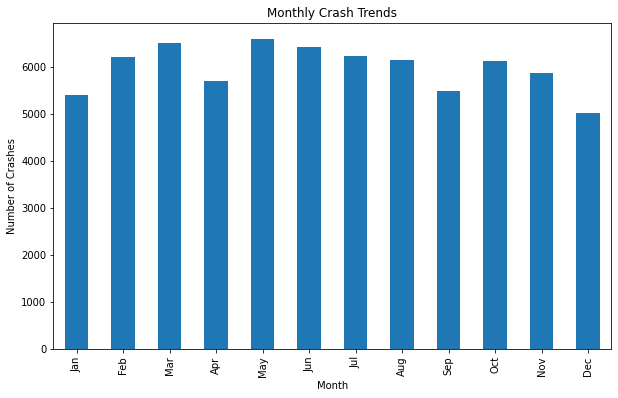

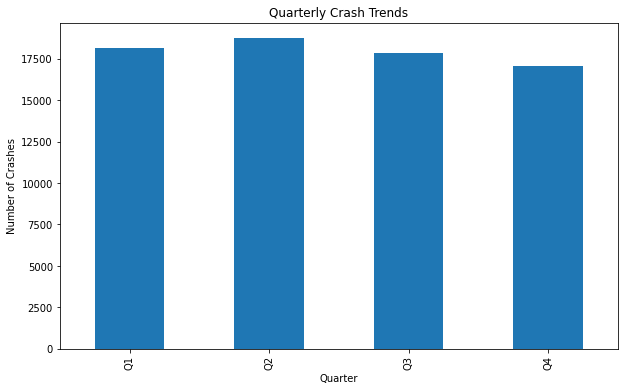

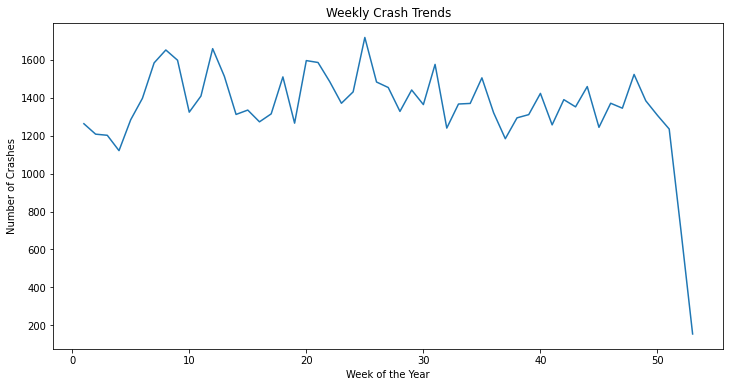

In [8]:
# Analyzing Monthly Trends (across all years)
monthly_trends = data.groupby('MONTH').size()
plt.figure(figsize=(10, 6))
monthly_trends.plot(kind='bar')
plt.title('Monthly Crash Trends')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Extract quarter
data['QUARTER'] = data['CRASH_DATE'].dt.quarter

# Analyzing Quarterly Trends
quarterly_trends = data.groupby('QUARTER').size()
plt.figure(figsize=(10, 6))
quarterly_trends.plot(kind='bar')
plt.title('Quarterly Crash Trends')
plt.xlabel('Quarter')
plt.ylabel('Number of Crashes')
plt.xticks(range(0, 4), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.show()

# Extract week
data['WEEK'] = data['CRASH_DATE'].dt.isocalendar().week

# Analyzing Weekly Trends
weekly_trends = data.groupby('WEEK').size()
plt.figure(figsize=(12, 6))
weekly_trends.plot(kind='line')
plt.title('Weekly Crash Trends')
plt.xlabel('Week of the Year')
plt.ylabel('Number of Crashes')
plt.show()

# Resources
- [Kaggle](https://www.kaggle.com/datasets)
- [Radar](https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html#sphx-glr-gallery-specialty-plots-radar-chart-py)
- [Seaborn](https://www.datacamp.com/tutorial/seaborn-python-tutorial)
- [Bluetooth](https://data.gov.au/dataset/ds-act-https%3A%2F%2Fwww.data.act.gov.au%2Fapi%2Fviews%2F798w-z7cq/details?q=)
- [ACT data](https://data.gov.au/dataset/ds-act-https%3A%2F%2Fwww.data.act.gov.au%2Fapi%2Fviews%2F6jn4-m8rx/details?q=)
- [WorldBank](https://data.worldbank.org/)
- [Data.World Travel](https://data.world/search?q=travel)
- [Data.gov.au](https://data.gov.au/search?page=8)
- [WB Ecn.Monitor](https://datacatalog.worldbank.org/search/dataset/0037798/Global-Economic-Monitor)
- [Croatia](https://datacatalog.worldbank.org/search?fq=(geographical_extent%2Fcoverage%2Fany(geo:geo%2Fname%20eq%20%27Croatia%27))&q=&start=11)
- [Brain drain](https://datacatalog.worldbank.org/search/dataset/0043585/Measuring-Brain-Drain-by-Gender-1990-2000)